# Data Overview

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,crimes
0,"Kaunas, Dainava, Taikos pr., 2 rooms flat for ...",450 €,"(8,6 €/m²)","52,18 m²",2,1987.0,Brick,Fully equipped,Central,NaN,"['august', '8', 'september', '2', 'october', '..."
1,"Kaunas, Aleksotas, Veiverių g., 1 room flat fo...",340 €,"(8,5 €/m²)",40 m²,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",NaN,"['august', '2', 'september', '0', 'october', '..."
2,"Kaunas, Senamiestis, Nemuno g., 2 rooms flat f...",590 €,"(10,0 €/m²)",59 m²,2,1940.0,Brick,Fully equipped,"Electric, gas",NaN,"['august', '2', 'september', '6', 'october', '..."
3,"Kaunas, Centras, Laisvės al., 2 rooms flat for...",550 €,"(12,2 €/m²)",45 m²,2,1900.0,Brick,Fully equipped,Central,"28,35 €/month~ 0,63 €/m²","['2024-10', '0.19', '2024-11', '0.6', '2024-12..."
4,"Kaunas, Centras, Kęstučio g., 1 room flat for ...",240 €,"(15,0 €/m²)",16 m²,1,1959.0,Brick,Fully equipped,Central,"11,36 €/month~ 0,71 €/m²","['2024-10', '0.37', '2024-11', '0.71', '2024-1..."


# Data Preprocessing

### Removing unneeded symbols

In [4]:
df['total_price']=df['total_price'].astype(str).str.replace(r'[ €]', '', regex=True).astype(float)

df['price_per_meter']=(df['price_per_meter'].astype(str)
    .str.replace(r'[( €/m²)]', '', regex=True)
    .str.replace(',', '.', regex=False)).astype(float)

df['area']=(df['area'].astype(str)
    .str.replace('m²', '', regex=True)
    .str.replace(',', '.', regex=True)).astype(float)

df['avg_heating_price']=(df['avg_heating_price'].astype(str)
                        .str.replace('€/month~', '', regex=True)
                        .str.replace('€/m²', '', regex=True)
                        .str.replace(',', '.', regex=True))

df['avg_heating_price']=df['avg_heating_price'].str.split(' ').str[0]

df.head()

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,crimes
0,"Kaunas, Dainava, Taikos pr., 2 rooms flat for ...",450.0,8.6,52.18,2,1987.0,Brick,Fully equipped,Central,nan,"['august', '8', 'september', '2', 'october', '..."
1,"Kaunas, Aleksotas, Veiverių g., 1 room flat fo...",340.0,8.5,40.00,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",nan,"['august', '2', 'september', '0', 'october', '..."
2,"Kaunas, Senamiestis, Nemuno g., 2 rooms flat f...",590.0,10.0,59.00,2,1940.0,Brick,Fully equipped,"Electric, gas",nan,"['august', '2', 'september', '6', 'october', '..."
3,"Kaunas, Centras, Laisvės al., 2 rooms flat for...",550.0,12.2,45.00,2,1900.0,Brick,Fully equipped,Central,28.35,"['2024-10', '0.19', '2024-11', '0.6', '2024-12..."
4,"Kaunas, Centras, Kęstučio g., 1 room flat for ...",240.0,15.0,16.00,1,1959.0,Brick,Fully equipped,Central,11.36,"['2024-10', '0.37', '2024-11', '0.71', '2024-1..."


### Cleaning crimes column

In [5]:
df['crimes']=df['crimes'].astype(str).str.split(',').str[1::2]

def keep_integers(lst):
    result = []
    for item in lst:  
        s = item.strip(" '\"")  
        if s.isdigit():       
            result.append(int(s))
    return result

# Apply to the column
df['crimes'] = df['crimes'].apply(keep_integers)

df.head()

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,crimes
0,"Kaunas, Dainava, Taikos pr., 2 rooms flat for ...",450.0,8.6,52.18,2,1987.0,Brick,Fully equipped,Central,nan,"[8, 2, 1, 4, 8, 2, 6, 5, 4, 2, 0, 6, 5, 2, 13,..."
1,"Kaunas, Aleksotas, Veiverių g., 1 room flat fo...",340.0,8.5,40.00,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",nan,"[2, 0, 2, 0, 3, 1, 0, 1, 1, 1, 3, 6, 1, 3, 0, ..."
2,"Kaunas, Senamiestis, Nemuno g., 2 rooms flat f...",590.0,10.0,59.00,2,1940.0,Brick,Fully equipped,"Electric, gas",nan,"[2, 6, 5, 6, 13, 8, 18, 21, 10, 17, 7, 9, 8, 1..."
3,"Kaunas, Centras, Laisvės al., 2 rooms flat for...",550.0,12.2,45.00,2,1900.0,Brick,Fully equipped,Central,28.35,"[37, 36, 22, 10, 27, 12, 18, 32, 31, 52, 41, 2..."
4,"Kaunas, Centras, Kęstučio g., 1 room flat for ...",240.0,15.0,16.00,1,1959.0,Brick,Fully equipped,Central,11.36,"[45, 44, 30, 11, 21, 16, 18, 30, 36, 47, 41, 1..."


In [6]:
def total_num(lst):
    total = 0
    for item in lst:          
        clean_item = str(item).strip(" '\"")
        if clean_item.isdigit():  
            total += int(clean_item)
    return total

def count_sum(lst):
    if len(lst) != 23:
        lst = lst[1:]  
    return len(lst)

df['Total'] = df['crimes'].apply(total_num)

df['Avg'] = df['crimes'].apply(count_sum)

df.head()

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,crimes,Total,Avg
0,"Kaunas, Dainava, Taikos pr., 2 rooms flat for ...",450.0,8.6,52.18,2,1987.0,Brick,Fully equipped,Central,nan,"[8, 2, 1, 4, 8, 2, 6, 5, 4, 2, 0, 6, 5, 2, 13,...",104,23
1,"Kaunas, Aleksotas, Veiverių g., 1 room flat fo...",340.0,8.5,40.00,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",nan,"[2, 0, 2, 0, 3, 1, 0, 1, 1, 1, 3, 6, 1, 3, 0, ...",47,23
2,"Kaunas, Senamiestis, Nemuno g., 2 rooms flat f...",590.0,10.0,59.00,2,1940.0,Brick,Fully equipped,"Electric, gas",nan,"[2, 6, 5, 6, 13, 8, 18, 21, 10, 17, 7, 9, 8, 1...",259,23
3,"Kaunas, Centras, Laisvės al., 2 rooms flat for...",550.0,12.2,45.00,2,1900.0,Brick,Fully equipped,Central,28.35,"[37, 36, 22, 10, 27, 12, 18, 32, 31, 52, 41, 2...",569,23
4,"Kaunas, Centras, Kęstučio g., 1 room flat for ...",240.0,15.0,16.00,1,1959.0,Brick,Fully equipped,Central,11.36,"[45, 44, 30, 11, 21, 16, 18, 30, 36, 47, 41, 1...",626,23


In [7]:
df['Average_crimes']=round(df['Total']/23, 1)
df.head()

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,crimes,Total,Avg,Average_crimes
0,"Kaunas, Dainava, Taikos pr., 2 rooms flat for ...",450.0,8.6,52.18,2,1987.0,Brick,Fully equipped,Central,nan,"[8, 2, 1, 4, 8, 2, 6, 5, 4, 2, 0, 6, 5, 2, 13,...",104,23,4.5
1,"Kaunas, Aleksotas, Veiverių g., 1 room flat fo...",340.0,8.5,40.00,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",nan,"[2, 0, 2, 0, 3, 1, 0, 1, 1, 1, 3, 6, 1, 3, 0, ...",47,23,2.0
2,"Kaunas, Senamiestis, Nemuno g., 2 rooms flat f...",590.0,10.0,59.00,2,1940.0,Brick,Fully equipped,"Electric, gas",nan,"[2, 6, 5, 6, 13, 8, 18, 21, 10, 17, 7, 9, 8, 1...",259,23,11.3
3,"Kaunas, Centras, Laisvės al., 2 rooms flat for...",550.0,12.2,45.00,2,1900.0,Brick,Fully equipped,Central,28.35,"[37, 36, 22, 10, 27, 12, 18, 32, 31, 52, 41, 2...",569,23,24.7
4,"Kaunas, Centras, Kęstučio g., 1 room flat for ...",240.0,15.0,16.00,1,1959.0,Brick,Fully equipped,Central,11.36,"[45, 44, 30, 11, 21, 16, 18, 30, 36, 47, 41, 1...",626,23,27.2


In [8]:
df['District'] = df['names'].str.split(',').str[1]
df['names'] = df['names'].apply(lambda x: ','.join(x.split(',')[2:]).strip())

df.head()

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,crimes,Total,Avg,Average_crimes,District
0,"Taikos pr., 2 rooms flat for rent",450.0,8.6,52.18,2,1987.0,Brick,Fully equipped,Central,nan,"[8, 2, 1, 4, 8, 2, 6, 5, 4, 2, 0, 6, 5, 2, 13,...",104,23,4.5,Dainava
1,"Veiverių g., 1 room flat for rent",340.0,8.5,40.00,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",nan,"[2, 0, 2, 0, 3, 1, 0, 1, 1, 1, 3, 6, 1, 3, 0, ...",47,23,2.0,Aleksotas
2,"Nemuno g., 2 rooms flat for rent",590.0,10.0,59.00,2,1940.0,Brick,Fully equipped,"Electric, gas",nan,"[2, 6, 5, 6, 13, 8, 18, 21, 10, 17, 7, 9, 8, 1...",259,23,11.3,Senamiestis
3,"Laisvės al., 2 rooms flat for rent",550.0,12.2,45.00,2,1900.0,Brick,Fully equipped,Central,28.35,"[37, 36, 22, 10, 27, 12, 18, 32, 31, 52, 41, 2...",569,23,24.7,Centras
4,"Kęstučio g., 1 room flat for rent",240.0,15.0,16.00,1,1959.0,Brick,Fully equipped,Central,11.36,"[45, 44, 30, 11, 21, 16, 18, 30, 36, 47, 41, 1...",626,23,27.2,Centras


### Droping unneeded columns

In [9]:
df=df.drop(columns=['crimes','Count', 'Total'], errors='ignore')

df.head() ##cleaned dataset

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,Avg,Average_crimes,District
0,"Taikos pr., 2 rooms flat for rent",450.0,8.6,52.18,2,1987.0,Brick,Fully equipped,Central,nan,23,4.5,Dainava
1,"Veiverių g., 1 room flat for rent",340.0,8.5,40.00,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",nan,23,2.0,Aleksotas
2,"Nemuno g., 2 rooms flat for rent",590.0,10.0,59.00,2,1940.0,Brick,Fully equipped,"Electric, gas",nan,23,11.3,Senamiestis
3,"Laisvės al., 2 rooms flat for rent",550.0,12.2,45.00,2,1900.0,Brick,Fully equipped,Central,28.35,23,24.7,Centras
4,"Kęstučio g., 1 room flat for rent",240.0,15.0,16.00,1,1959.0,Brick,Fully equipped,Central,11.36,23,27.2,Centras


In [10]:
df.to_csv('Rent_Kaunas.csv', index=False)

## Analysis of data

### Removing districs that are not part of the Kaunas

In [11]:
kaunas_districts = [
    'Aleksotas',
    'Centras',
    'Dainava',
    'Eiguliai',
    'Gričiupis',
    'Panemunė',
    'Petrašiūnai',
    'Žemieji Šančiai',
    'Šilainiai',
    'Vilijampolė',
    'Žaliakalnis'
]
df['District'] = df['District'].str.strip()
df=df[df['District'].isin(kaunas_districts)]
df.head()

,names,total_price,price_per_meter,area,rooms_number,build_year,building_type,equipment,heating_system,avg_heating_price,Avg,Average_crimes,District
0,"Taikos pr., 2 rooms flat for rent",450.0,8.6,52.18,2,1987.0,Brick,Fully equipped,Central,nan,23,4.5,Dainava
1,"Veiverių g., 1 room flat for rent",340.0,8.5,40.00,1,1990.0,Brick,Fully equipped,"Electric, solid fuel",nan,23,2.0,Aleksotas
3,"Laisvės al., 2 rooms flat for rent",550.0,12.2,45.00,2,1900.0,Brick,Fully equipped,Central,28.35,23,24.7,Centras
4,"Kęstučio g., 1 room flat for rent",240.0,15.0,16.00,1,1959.0,Brick,Fully equipped,Central,11.36,23,27.2,Centras
5,"Kęstučio g., 4 rooms flat for rent",850.0,10.9,78.00,4,1943.0,Brick,Fully equipped,Gas,32.76,23,22.0,Centras


### Comparing by average price per month

In [12]:
import matplotlib.pyplot as plt

In [13]:
df_prices=df.groupby('District', as_index=False).agg(
    Average_price=('total_price', 'mean'))

df_prices['Average_price']=round(df_prices['Average_price'])

df_prices=df_prices.sort_values(by='Average_price', ascending=True)

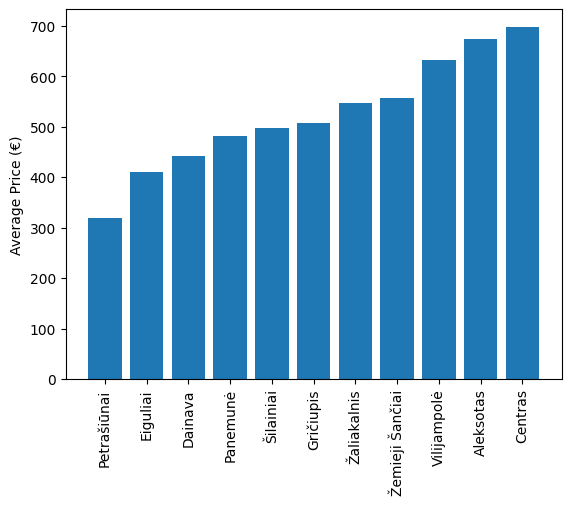

In [14]:
plt.bar(df_prices['District'], df_prices['Average_price'])
plt.ylabel("Average Price (€)")
plt.xticks(rotation = 90)
plt.show()

### Comparing price groups for each district

In [15]:
counts = df.groupby('District')['total_price'].agg(
    under_300_count=lambda x: (x <= 300).sum(),
    from_300_to_600=lambda x: ((300 < x) & (x <= 600)).sum(),
    from_600_to_900=lambda x: ((600 < x) & (x <= 900)).sum(),
    above_900_count=lambda x: (x > 900).sum()
).reset_index()

df_prices = df_prices.merge(counts, on='District', how='left')
df_prices

,District,Average_price,under_300_count,from_300_to_600,from_600_to_900,above_900_count
0,Petrašiūnai,320.0,9,8,0,0
1,Eiguliai,410.0,14,37,3,1
2,Dainava,442.0,21,109,15,0
3,Panemunė,481.0,1,8,2,0
4,Šilainiai,498.0,3,58,11,0
5,Gričiupis,508.0,1,13,3,0
6,Žaliakalnis,548.0,17,57,31,5
7,Žemieji Šančiai,558.0,3,9,6,2
8,Vilijampolė,632.0,4,28,10,5
9,Aleksotas,674.0,1,11,13,3


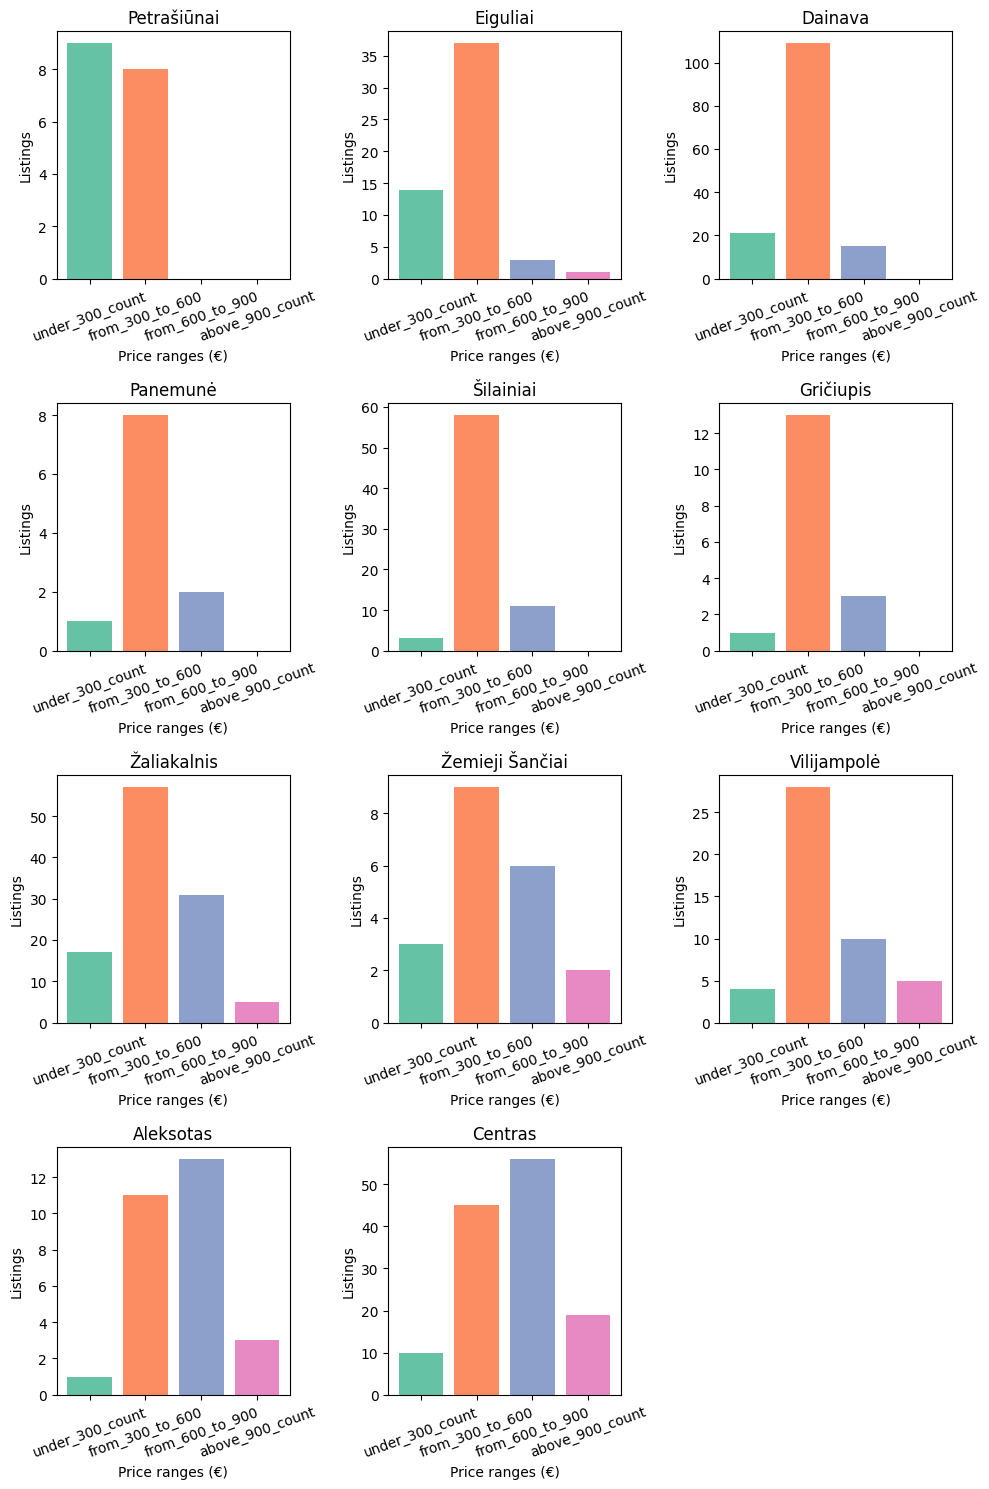

In [16]:
categories = ["under_300_count", "from_300_to_600", "from_600_to_900", "above_900_count"]

# Set how many subplots per figure (2x2 = 4 districts per figure)
rows = 4
cols = 3
plots_per_page = rows * cols

for i in range(0, len(df_prices), plots_per_page):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 15))
    axes = axes.flatten()  # make it easier to index

    for j, ax in enumerate(axes):
        if i + j < len(df_prices):
            row = df_prices.iloc[i + j]
            ax.bar(categories, [row[c] for c in categories],
                   color=["#66c2a5","#fc8d62","#8da0cb","#e78ac3"])
            ax.set_title(f"{row['District']}")
            ax.set_xlabel("Price ranges (€)")
            ax.set_ylabel("Listings")
            ax.tick_params(axis="x", rotation=20)
        else:
            ax.axis("off")  # hide empty subplot if districts don't fill grid

    plt.tight_layout()
    plt.show()

### Comparing by heating price

In [17]:
df['avg_heating_price']=pd.to_numeric(df['avg_heating_price'], errors='coerce')

df_heating=df.groupby('District', as_index=False).agg(
    Average_heating_price=('avg_heating_price', 'mean')
)

df_heating['Average_heating_price']=round(df_heating['Average_heating_price'],1)
df_heating=df_heating.sort_values(by='Average_heating_price', ascending=True)

df_heating.head()

,District,Average_heating_price
6,Petrašiūnai,28.5
10,Žemieji Šančiai,31.3
7,Vilijampolė,34.3
0,Aleksotas,37.4
4,Gričiupis,39.7


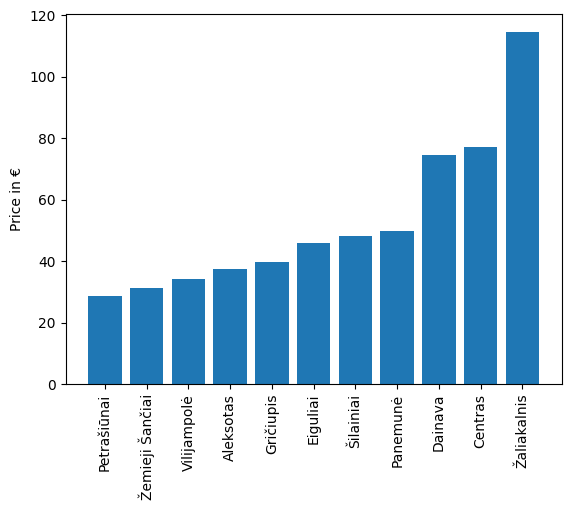

In [46]:
plt.bar(df_heating['District'], df_heating['Average_heating_price'])
plt.xticks(rotation = 90)
plt.ylabel('Price in €')
plt.show()

### Analysing amount of old buildings to new ones for each district

In [19]:
df_when_built=df.groupby('District', as_index=False)['build_year'].agg(
    Modern=lambda x: (x>=2000).sum(),
    Old=lambda x: (x<2000).sum()
).reset_index()
df_when_built = df_when_built.drop(columns=[ "index"])
df_when_built

,District,Modern,Old
0,Aleksotas,13,11
1,Centras,27,63
2,Dainava,23,115
3,Eiguliai,3,49
4,Gričiupis,2,12
5,Panemunė,2,8
6,Petrašiūnai,0,16
7,Vilijampolė,16,25
8,Šilainiai,17,49
9,Žaliakalnis,34,50


### Finding the most dangerous district

In [20]:
df_crimes=df.groupby('District', as_index=False).agg(
    Average_crimes=('Average_crimes', 'mean'))

df_crimes=df_crimes.sort_values(by='Average_crimes', ascending=True)

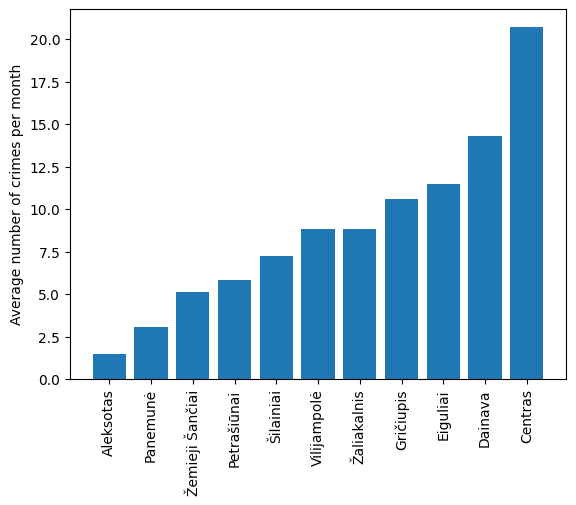

In [48]:
plt.bar(df_crimes['District'], df_crimes['Average_crimes'])
plt.xticks(rotation = 90)
plt.ylabel('Average number of crimes per month')
plt.show()

### Is bigger price means better safety?

In [22]:
df_comparison=df_crimes.merge(df_prices, how='left', on='District')

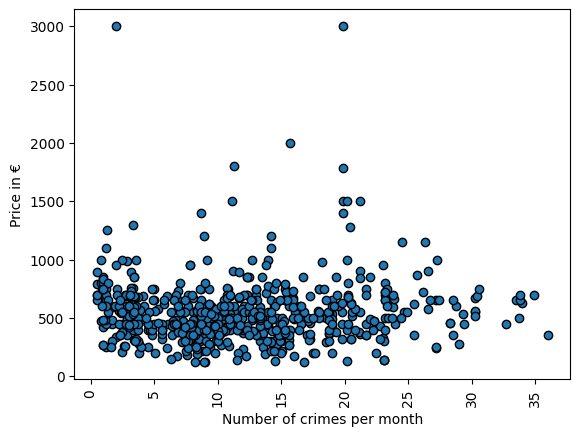

In [45]:
plt.scatter(df['Average_crimes'], df['total_price'], edgecolor='k')
plt.xticks(rotation = 90)
plt.ylabel('Price in €')
plt.xlabel('Number of crimes per month')
plt.show()

No, usually bigger average price for rent does not mean that district is safer 

### Is bigger prices getting you more area?

In [24]:
df_flat_size=df.groupby('District', as_index=False).agg(
    Average_area=('area', 'mean')
)

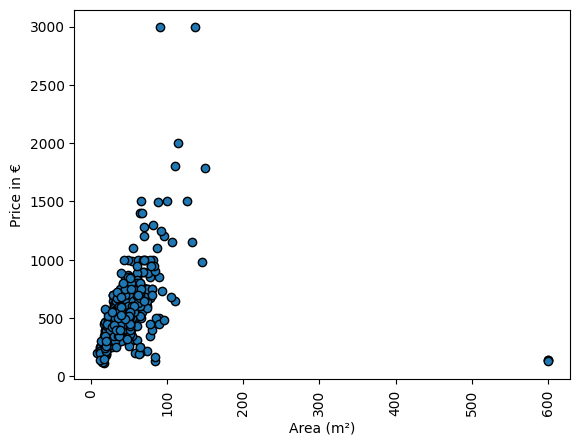

In [50]:
plt.scatter(df['area'], df['total_price'], edgecolor='k')
plt.xticks(rotation = 90)
plt.ylabel('Price in €')
plt.xlabel('Area (m²)')
plt.show()

The image shows its true most of the times

### Ranking by average price 

In [26]:
df_prices['Rank_by_prices'] = df_prices['Average_price'].rank()
df_prices.head()

,District,Average_price,under_300_count,from_300_to_600,from_600_to_900,above_900_count,Rank_by_prices
0,Petrašiūnai,320.0,9,8,0,0,1.0
1,Eiguliai,410.0,14,37,3,1,2.0
2,Dainava,442.0,21,109,15,0,3.0
3,Panemunė,481.0,1,8,2,0,4.0
4,Šilainiai,498.0,3,58,11,0,5.0


### Ranking by heating price

In [27]:
df_heating['Heating_prices_rank']=df_heating['Average_heating_price'].rank()
df_heating.head()

,District,Average_heating_price,Heating_prices_rank
6,Petrašiūnai,28.5,1.0
10,Žemieji Šančiai,31.3,2.0
7,Vilijampolė,34.3,3.0
0,Aleksotas,37.4,4.0
4,Gričiupis,39.7,5.0


### Ranking each district by crime level

In [28]:
df_crimes['Rank_by_crimes'] = df_crimes['Average_crimes'].rank()
df_crimes.head()

,District,Average_crimes,Rank_by_crimes
0,Aleksotas,1.496429,1.0
5,Panemunė,3.036364,2.0
10,Žemieji Šančiai,5.125000,3.0
6,Petrašiūnai,5.829412,4.0
8,Šilainiai,7.227778,5.0


### Ranking each district by average area

In [29]:
df_flat_size['Rank_by_area']=df_flat_size['Average_area'].rank(ascending=False)
df_flat_size.head()

,District,Average_area,Rank_by_area
0,Aleksotas,44.554286,7.0
1,Centras,62.523000,1.0
2,Dainava,38.132000,10.0
3,Eiguliai,41.708182,9.0
4,Gričiupis,45.440000,5.0


### Ranking each district by average number of rooms

In [30]:
df_rooms=df.groupby('District', as_index=False).agg(
    Average_rooms_number=('rooms_number', 'mean')
)
df_rooms['Average_rooms_number']=df_rooms['Average_rooms_number']
df_rooms['Average_rooms_number_ranked']=df_rooms['Average_rooms_number'].rank(method='dense')
df_rooms

,District,Average_rooms_number,Average_rooms_number_ranked
0,Aleksotas,2.000000,6.0
1,Centras,2.176923,9.0
2,Dainava,1.579310,1.0
3,Eiguliai,1.745455,3.0
4,Gričiupis,2.000000,6.0
5,Panemunė,2.000000,6.0
6,Petrašiūnai,1.588235,2.0
7,Vilijampolė,2.085106,8.0
8,Šilainiai,2.055556,7.0
9,Žaliakalnis,1.881818,5.0


### Ranking each district by distance to the city centre

In [31]:
kaunas_rank = {
    1: "Centras",
    2: "Žaliakalnis",
    3: "Vilijampolė",
    4: "Gričiupis",
    5: "Aleksotas",
    6: "Žemieji Šančiai",
    7: "Šilainiai",
    8: "Panemunė",
    9: "Petrašiūnai",
    10: "Eiguliai",
    11: "Dainava"
}

for key, value in kaunas_rank.items():
    for id, item in df_crimes['District'].items():
        if value == item:
            #adding to any previous df
            df_crimes.loc[id, 'Ranked_by_CC_distance']=key
            
df_crimes

,District,Average_crimes,Rank_by_crimes,Ranked_by_CC_distance
0,Aleksotas,1.496429,1.0,5.0
5,Panemunė,3.036364,2.0,8.0
10,Žemieji Šančiai,5.125000,3.0,6.0
6,Petrašiūnai,5.829412,4.0,9.0
8,Šilainiai,7.227778,5.0,7.0
7,Vilijampolė,8.825532,6.0,3.0
9,Žaliakalnis,8.850909,7.0,2.0
4,Gričiupis,10.600000,8.0,4.0
3,Eiguliai,11.452727,9.0,10.0
2,Dainava,14.285517,10.0,11.0


## Creating final dataframe

In [32]:
final_df=df_crimes.merge(df_prices, how='left', on='District')
final_df.head()

,District,Average_crimes,Rank_by_crimes,Ranked_by_CC_distance,Average_price,under_300_count,from_300_to_600,from_600_to_900,above_900_count,Rank_by_prices
0,Aleksotas,1.496429,1.0,5.0,674.0,1,11,13,3,10.0
1,Panemunė,3.036364,2.0,8.0,481.0,1,8,2,0,4.0
2,Žemieji Šančiai,5.125000,3.0,6.0,558.0,3,9,6,2,8.0
3,Petrašiūnai,5.829412,4.0,9.0,320.0,9,8,0,0,1.0
4,Šilainiai,7.227778,5.0,7.0,498.0,3,58,11,0,5.0


In [33]:
final_df=final_df.merge(df_when_built, on='District', how='left')
final_df.head()

,District,Average_crimes,Rank_by_crimes,Ranked_by_CC_distance,Average_price,under_300_count,from_300_to_600,from_600_to_900,above_900_count,Rank_by_prices,Modern,Old
0,Aleksotas,1.496429,1.0,5.0,674.0,1,11,13,3,10.0,13,11
1,Panemunė,3.036364,2.0,8.0,481.0,1,8,2,0,4.0,2,8
2,Žemieji Šančiai,5.125000,3.0,6.0,558.0,3,9,6,2,8.0,10,5
3,Petrašiūnai,5.829412,4.0,9.0,320.0,9,8,0,0,1.0,0,16
4,Šilainiai,7.227778,5.0,7.0,498.0,3,58,11,0,5.0,17,49


In [34]:
final_df=final_df.merge(df_heating, on='District', how='left')
final_df.head()

,District,Average_crimes,Rank_by_crimes,Ranked_by_CC_distance,Average_price,under_300_count,from_300_to_600,from_600_to_900,above_900_count,Rank_by_prices,Modern,Old,Average_heating_price,Heating_prices_rank
0,Aleksotas,1.496429,1.0,5.0,674.0,1,11,13,3,10.0,13,11,37.4,4.0
1,Panemunė,3.036364,2.0,8.0,481.0,1,8,2,0,4.0,2,8,49.7,8.0
2,Žemieji Šančiai,5.125000,3.0,6.0,558.0,3,9,6,2,8.0,10,5,31.3,2.0
3,Petrašiūnai,5.829412,4.0,9.0,320.0,9,8,0,0,1.0,0,16,28.5,1.0
4,Šilainiai,7.227778,5.0,7.0,498.0,3,58,11,0,5.0,17,49,48.2,7.0


In [35]:
final_df=final_df.merge(df_flat_size, on='District', how='left')
final_df.head()

,District,Average_crimes,Rank_by_crimes,Ranked_by_CC_distance,Average_price,under_300_count,from_300_to_600,from_600_to_900,above_900_count,Rank_by_prices,Modern,Old,Average_heating_price,Heating_prices_rank,Average_area,Rank_by_area
0,Aleksotas,1.496429,1.0,5.0,674.0,1,11,13,3,10.0,13,11,37.4,4.0,44.554286,7.0
1,Panemunė,3.036364,2.0,8.0,481.0,1,8,2,0,4.0,2,8,49.7,8.0,43.363636,8.0
2,Žemieji Šančiai,5.125000,3.0,6.0,558.0,3,9,6,2,8.0,10,5,31.3,2.0,47.444500,4.0
3,Petrašiūnai,5.829412,4.0,9.0,320.0,9,8,0,0,1.0,0,16,28.5,1.0,33.211176,11.0
4,Šilainiai,7.227778,5.0,7.0,498.0,3,58,11,0,5.0,17,49,48.2,7.0,49.998611,3.0


In [36]:
final_df['Average_area']=round(final_df['Average_area'], 1)
final_df['Average_crimes']=round(final_df['Average_crimes'], 1)

In [37]:
final_df=final_df.merge(df_rooms, on='District', how='left')
final_df

,District,Average_crimes,Rank_by_crimes,Ranked_by_CC_distance,Average_price,under_300_count,from_300_to_600,from_600_to_900,above_900_count,Rank_by_prices,Modern,Old,Average_heating_price,Heating_prices_rank,Average_area,Rank_by_area,Average_rooms_number,Average_rooms_number_ranked
0,Aleksotas,1.5,1.0,5.0,674.0,1,11,13,3,10.0,13,11,37.4,4.0,44.6,7.0,2.000000,6.0
1,Panemunė,3.0,2.0,8.0,481.0,1,8,2,0,4.0,2,8,49.7,8.0,43.4,8.0,2.000000,6.0
2,Žemieji Šančiai,5.1,3.0,6.0,558.0,3,9,6,2,8.0,10,5,31.3,2.0,47.4,4.0,1.800000,4.0
3,Petrašiūnai,5.8,4.0,9.0,320.0,9,8,0,0,1.0,0,16,28.5,1.0,33.2,11.0,1.588235,2.0
4,Šilainiai,7.2,5.0,7.0,498.0,3,58,11,0,5.0,17,49,48.2,7.0,50.0,3.0,2.055556,7.0
5,Vilijampolė,8.8,6.0,3.0,632.0,4,28,10,5,9.0,16,25,34.3,3.0,51.3,2.0,2.085106,8.0
6,Žaliakalnis,8.9,7.0,2.0,548.0,17,57,31,5,7.0,34,50,114.6,11.0,45.1,6.0,1.881818,5.0
7,Gričiupis,10.6,8.0,4.0,508.0,1,13,3,0,6.0,2,12,39.7,5.0,45.4,5.0,2.000000,6.0
8,Eiguliai,11.5,9.0,10.0,410.0,14,37,3,1,2.0,3,49,46.0,6.0,41.7,9.0,1.745455,3.0
9,Dainava,14.3,10.0,11.0,442.0,21,109,15,0,3.0,23,115,74.7,9.0,38.1,10.0,1.579310,1.0


In [38]:
final_df.to_csv('Data.csv', index=False)